### pandas – Used for data manipulation and analysis using DataFrames.
### numpy – Used for numerical operations and working with arrays.
### matplotlib.pyplot – Used for creating basic data visualizations like plots and charts.
### seaborn – Used for advanced and attractive statistical data visualizations.
### train_test_split (from sklearn.model_selection) – Splits data into training and testing sets.
### SVR (from sklearn.svm) – Implements Support Vector Regression for predictive modeling.
### mean_squared_error, r2_score (from sklearn.metrics) – Used to evaluate the accuracy of regression models.
### pickle – Used to save and load machine learning models.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import pickle

# Step 1:Data Collection And Load

In [2]:

class CarPriceDataset:
    def __init__(self, filepath):
        self.filepath = filepath
        self.df = None
    """
    Class Overview:
    The CarPriceDataset class is used to handle the loading and previewing
    of a car price dataset stored in a CSV file.

    Parameters
    filepath : str

    Description:
    This class performs the following functions:
    - Loads the dataset from the given file path.
    - Displays basic structure and first few rows of the dataset.
    """
    

    def load_data(self):
        self.df = pd.read_csv(self.filepath)
        return self.df

    def initial_info(self):
        return self.df.info(), self.df.head()


dataset = CarPriceDataset("quikr_car.csv")

df = dataset.load_data() 

info, head = dataset.initial_info()

print(" Dataset Info:")
print(info)

print("\n First 5 Rows:")
print(head)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB
 Dataset Info:
None

 First 5 Rows:
                                     name   company  year          Price  \
0    Hyundai Santro Xing XO eRLX Euro III   Hyundai  2007         80,000   
1                 Mahindra Jeep CL550 MDI  Mahindra  2006       4,25,000   
2              Maruti Suzuki Alto 800 Vxi    Maruti  2018  Ask For Price   
3  Hyundai Grand i10 Magna 1.2 Kappa VTVT   Hyundai  2014       3,25,000   
4        Ford EcoSport Titanium 1.5L TDCi      Ford  2014       5,75,000   

   kms_driven fuel_type  
0  45,000 kms   

# Step 2: Data Preprocessing

In [3]:

class DataPreprocessor:
    def __init__(self, df):
        self.df = df.copy()
        self.clean_data()
    """
    Function Overview
    This class is used for cleaning, encoding, and preprocessing raw data for machine learning models.

    Parameters: \n
    df : pandas.DataFrame
         Required. Original raw dataset
    
    Description:
    This class handles:
    - Cleaning and converting datatypes (e.g., 'year', 'Price', 'kms_driven')
    - Handling missing values using mean or mode
    - Removing duplicates
    - Scaling numeric features using StandardScaler
    - Encoding categorical features into numeric format
    """


    def clean_data(self):
        self.df['year'] = pd.to_numeric(self.df['year'], errors='coerce')
        self.df['Price'] = self.df['Price'].astype(str).str.replace(',', '', regex=False).str.replace('₹', '', regex=False)
        self.df['Price'] = pd.to_numeric(self.df['Price'], errors='coerce')
        self.df['kms_driven'] = self.df['kms_driven'].astype(str).str.replace(' kms', '', regex=False).str.replace(',', '', regex=False)
        self.df['kms_driven'] = pd.to_numeric(self.df['kms_driven'], errors='coerce')

    def show_nulls(self):
        return self.df.isnull().sum()

    def show_duplicates(self):
        return self.df.duplicated().sum()

    def remove_duplicates(self):
        self.df = self.df.drop_duplicates()
        return self.df

    def fillna_with_mean(self):
        for col in self.df.select_dtypes(include=['float64', 'int64']):
            self.df[col] = self.df[col].fillna(self.df[col].mean())
        return self.df

    def fillna_with_mode(self):
        for col in self.df.columns:
            self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
        return self.df

    def scale_features(self):
        scaler = StandardScaler()
        numeric_cols = self.df.select_dtypes(include=['int64', 'float64']).columns
        self.df[numeric_cols] = scaler.fit_transform(self.df[numeric_cols])
        return self.df

    def encode_categorical(self):
        for col in self.df.select_dtypes(include=['object']).columns:
            self.df[col] = self.df[col].astype('category').cat.codes
        return self.df

    def get_dataframe(self):
        return self.df
    
prep = DataPreprocessor(df)
prep.fillna_with_mean()
prep.fillna_with_mode()
prep.remove_duplicates()
prep.encode_categorical()
prep.scale_features()

final_df = prep.get_dataframe()
prep.show_nulls(), prep.show_duplicates(), final_df.dtypes, final_df.head()

(name          0
 company       0
 year          0
 Price         0
 kms_driven    0
 fuel_type     0
 dtype: int64,
 0,
 name            int16
 company          int8
 year          float64
 Price         float64
 kms_driven    float64
 fuel_type        int8
 dtype: object,
    name  company      year     Price  kms_driven  fuel_type
 0   154       14 -1.349704 -0.688763   -0.043108          2
 1   204       20 -1.598929  0.062754   -1.381628          0
 2   254       21  1.391764  0.018510   -0.727849          2
 3   143       14  0.394866 -0.155077   -0.549221          2
 4    61       11  0.394866  0.389501   -0.311050          0)

# Univariate Analysis

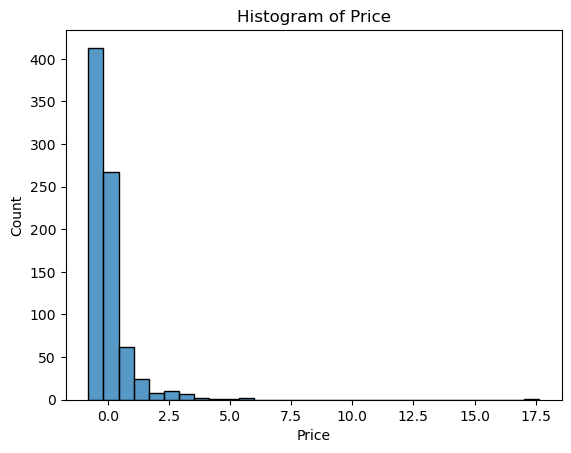

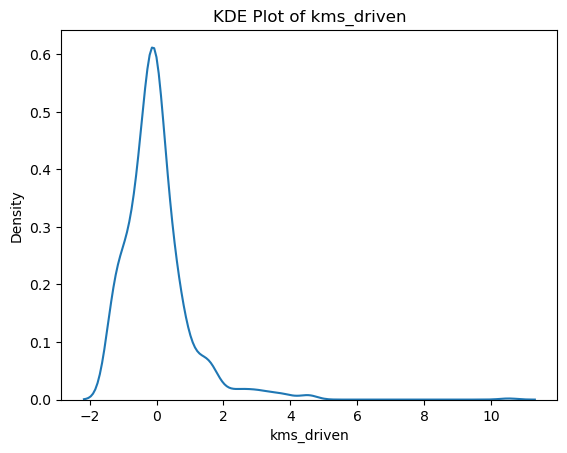

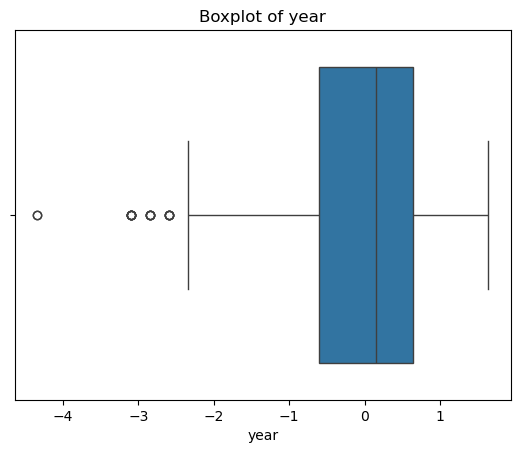

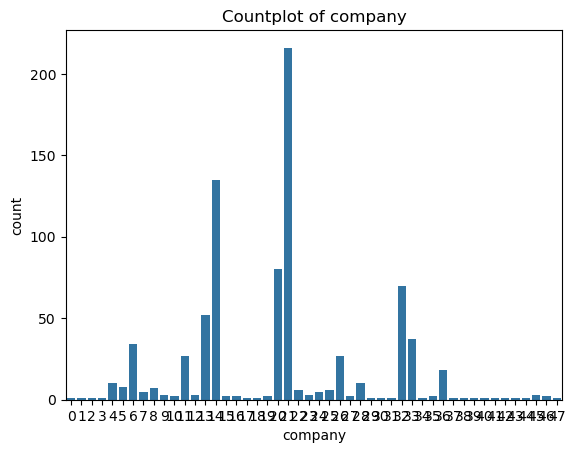

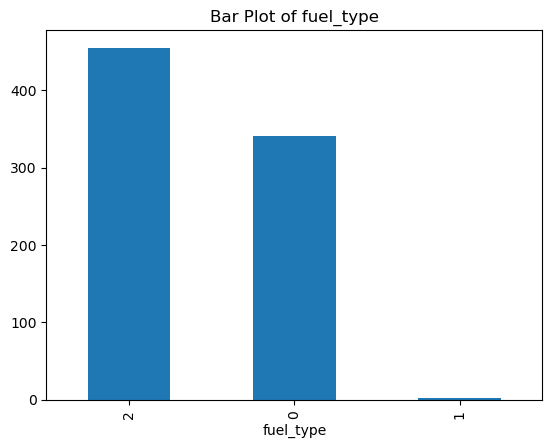

In [4]:

class UnivariatePlots:
    def __init__(self, df):
        self.df = df
    """
    Class Overview:
    ----------------
    The UnivariatePlots class provides common univariate analysis plots 
    for both numeric and categorical columns from a given pandas DataFrame.

    Parameters:
    ------------
    df : pandas.DataFrame
        The input dataset on which visualizations are to be applied.

    Description:
    ------------
    This class supports the following plot types:
    1. Histogram          – Displays frequency distribution of a numeric column.
    2. KDE Plot           – Plots a smoothed density estimation for numeric data.
    3. Boxplot            – Highlights data spread and outliers in numeric data.
    4. Countplot          – Shows frequency of categorical values using bars.
    5. Value Counts Plot  – Plots a bar chart of value counts for any column.
    """

    def histogram(self, column):
        sns.histplot(self.df[column], bins=30)
        plt.title(f"Histogram of {column}")
        plt.show()

    def kdeplot(self, column):
        sns.kdeplot(self.df[column])
        plt.title(f"KDE Plot of {column}")
        plt.show()

    def boxplot(self, column):
        sns.boxplot(x=self.df[column])
        plt.title(f"Boxplot of {column}")
        plt.show()

    def countplot(self, column):
        sns.countplot(x=self.df[column])
        plt.title(f"Countplot of {column}")
        plt.show()

    def value_counts_plot(self, column):
        self.df[column].value_counts().plot(kind='bar')
        plt.title(f"Bar Plot of {column}")
        plt.show()
uni = UnivariatePlots(final_df)
uni.histogram('Price')
uni.kdeplot('kms_driven')
uni.boxplot('year')
uni.countplot('company')
uni.value_counts_plot('fuel_type')


# Bivariate Analysis 

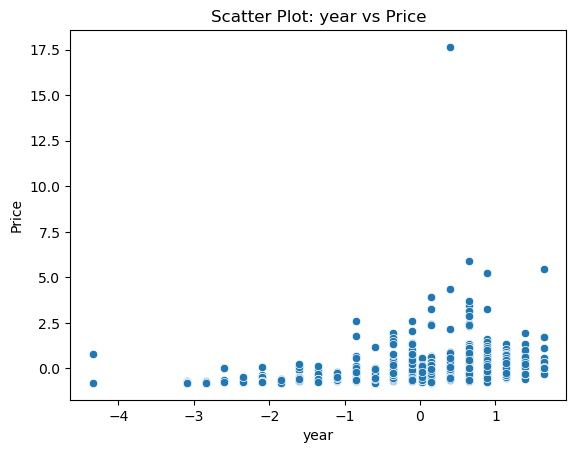

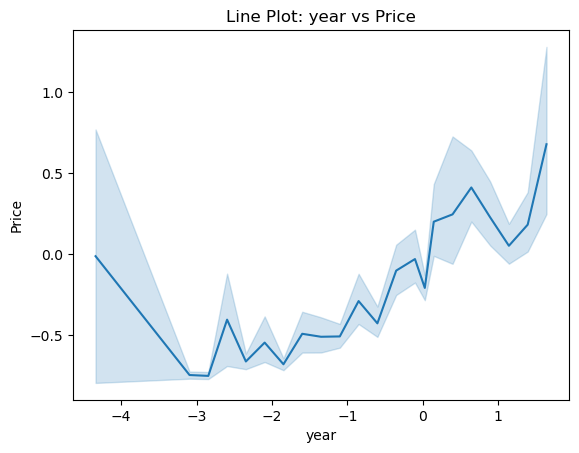

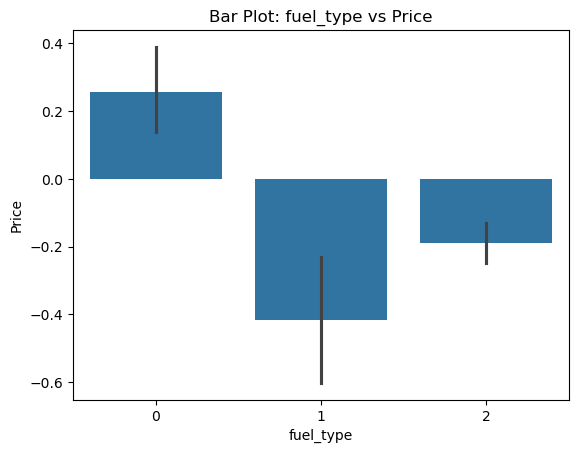

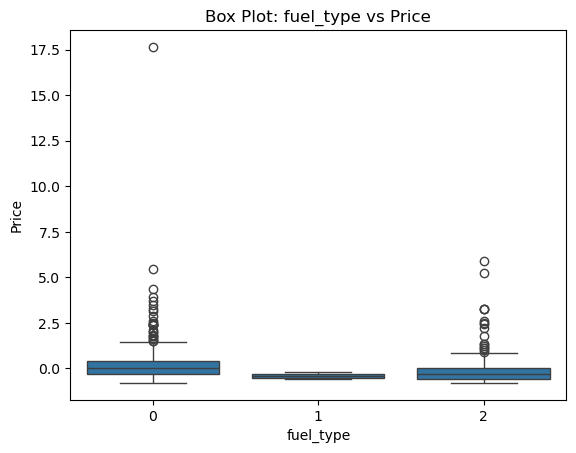

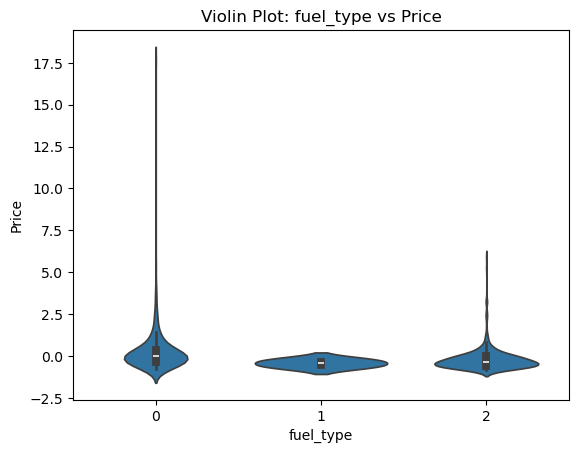

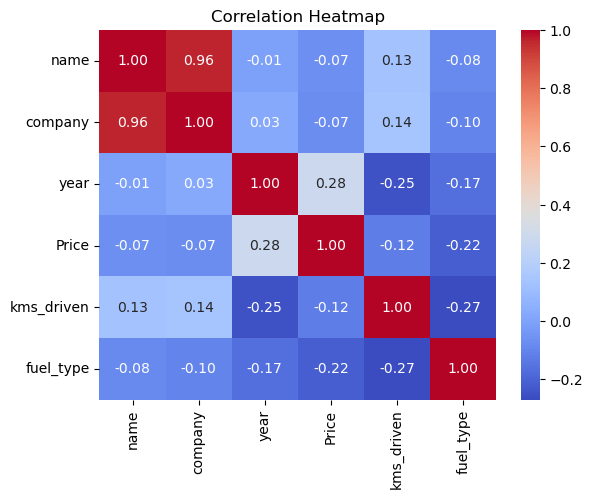

In [5]:

class BivariatePlots:
    """
    Class Overview:
    ----------------
    The BivariatePlots class provides tools to visualize relationships between two variables 
    from a DataFrame using a variety of standard statistical plots.

    Parameters:
    ------------
    df : pandas.DataFrame
        The input dataset used for generating bivariate plots.

    Description:
    ------------
    This class includes the following bivariate plots:
    1. Scatter Plot         – Shows correlation between two numeric columns.
    2. Line Plot            – Displays trend between two continuous variables.
    3. Bar Plot             – Compares categorical variable with a numeric target.
    4. Box Plot             – Shows distribution of numeric values by category.
    5. Violin Plot          – Combines boxplot and KDE by category.
    6. Heatmap              – Shows correlation matrix of numeric features.
    """

    def __init__(self, df):
        self.df = df

    def scatter_plot(self, x_col, y_col):
        sns.scatterplot(x=self.df[x_col], y=self.df[y_col])
        plt.title(f"Scatter Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def line_plot(self, x_col, y_col):
        sns.lineplot(x=self.df[x_col], y=self.df[y_col])
        plt.title(f"Line Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def bar_plot(self, x_col, y_col):
        sns.barplot(x=self.df[x_col], y=self.df[y_col])
        plt.title(f"Bar Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def box_plot(self, x_col, y_col):
        sns.boxplot(x=self.df[x_col], y=self.df[y_col])
        plt.title(f"Box Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def violin_plot(self, x_col, y_col):
        sns.violinplot(x=self.df[x_col], y=self.df[y_col])
        plt.title(f"Violin Plot: {x_col} vs {y_col}")
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        plt.show()

    def correlation_heatmap(self):
        corr = self.df.corr(numeric_only=True)
        sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
        plt.title("Correlation Heatmap")
        plt.show()
biv = BivariatePlots(final_df)
biv.scatter_plot('year', 'Price')
biv.line_plot('year', 'Price')
biv.bar_plot('fuel_type', 'Price')
biv.box_plot('fuel_type', 'Price')
biv.violin_plot('fuel_type', 'Price')
biv.correlation_heatmap()


# Step 3: Data Splitting 


In [6]:

class DataSplitter:
    def __init__(self, df, feature_cols, target_col):
        self.df = df
        self.feature_cols = feature_cols
        self.target_col = target_col
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        self.split_data()
    """
    Class Overview:
    ----------------
    The DataSplitter class handles the separation of features (X) and target (y),
    followed by train-test splitting for model development.

    Parameters:
    ------------
    df : pandas.DataFrame
        The input dataset to be split.

    feature_cols : list
        A list of column names to be used as features (X).

    target_col : str
        The column name to be used as target (y).

    Description:
    -------------
    - Splits the dataset into features and target.
    - Divides data into training and testing sets.
    - Shapes can be accessed via get_shapes().
    """

    def split_data(self, test_size=0.2, random_state=42):
        X = self.df[self.feature_cols]
        y = self.df[self.target_col]
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X, y, test_size=test_size, random_state=random_state
        )

    def get_splits(self):
        return self.X_train, self.X_test, self.y_train, self.y_test

    def get_shapes(self):
        return {
            'X_train': self.X_train.shape,
            'X_test': self.X_test.shape,
            'y_train': self.y_train.shape,
            'y_test': self.y_test.shape
        }
features = ['year', 'kms_driven', 'fuel_type']
target = 'Price'
splitter = DataSplitter(final_df, features, target)
X_train, X_test, y_train, y_test = splitter.get_splits()
shapes = splitter.get_shapes()
shapes  


{'X_train': (638, 3), 'X_test': (160, 3), 'y_train': (638,), 'y_test': (160,)}

#  Step 4: Model Training (using SVM) 


In [17]:

class SVMModelTrainer:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = SVR()
        self.y_pred = None
        self.mse = None
        self.r2 = None
        self.train_model()
    """
    Model Trainer Class
    -------------------------
    Parameters:
    -----------
    X_train : pd.DataFrame
        Training features
    X_test : pd.DataFrame
        Testing features
    y_train : pd.Series
        Training target
    y_test : pd.Series
        Testing target

    Description:
    ------------
    Trains a Support Vector Regression (SVR) model on the training data
    and evaluates it using Mean Squared Error and R2 Score.
    """
    def train_model(self):
        self.model.fit(self.X_train, self.y_train)
        self.y_pred = self.model.predict(self.X_test)
        self.mse = mean_squared_error(self.y_test, self.y_pred)
        self.r2 = r2_score(self.y_test, self.y_pred)

    def get_metrics(self):
        return {
            "Mean Squared Error": round(self.mse, 2),
            "R2 Score": round(self.r2, 2)
        }

    def get_model(self):
        return self.model
trainer = SVMModelTrainer(X_train, X_test, y_train, y_test)
metrics = trainer.get_metrics()
model = trainer.get_model()
metrics  


{'Mean Squared Error': 0.6, 'R2 Score': 0.05}

# Step 5: Model Saving using Pickle 


In [19]:
import pickle

class ModelPersistence:
    def __init__(self, model, filename='model.pkl'):
        self.model = model
        self.filename = filename
    """
    Class Overview:
    ----------------
    Yeh class trained machine learning model ko save aur load karne ke liye use hoti hai.

    Parameters:
    -----------
    model : Trained machine learning model (jaise SVM, RandomForest, etc.)
    filename : File ka naam jisme model ko save/load karna ho (default: 'model.pkl')

    Description:
    ------------
    - save_model(): Model ko .pkl format me save karta hai.
    - load_model(): Saved model ko file se dobara load karta hai.
    """
    def save_model(self):
        with open(self.filename, 'wb') as file:
            pickle.dump(self.model, file)

    def load_model(self):
        with open(self.filename, 'rb') as file:
            loaded_model = pickle.load(file)
        return loaded_model
saver = ModelPersistence(model, 'svm_model.pkl')
saver.save_model()
loaded_model = saver.load_model()